### Value function for the policy of always giving a promotion (page 8 of slides)

In [2]:
import numpy as np

# Define transition probability matrices P(s'|s,a) for each action
P_a1 = np.array([[0.1, 0.9],    # Action a1: stay in state 1
                 [0.1, 0.9]])   # Action a1: stay in state 2

P_a2 = np.array([[0.5, 0.5],    # Action a2: move with some probability
                 [0.5, 0.5]])

# Define reward functions R(s, a)
R_a1 = np.array([1, 4])         # Reward if taking action a1 in states 1 and 2
R_a2 = np.array([2, 6])         # Reward if taking action a2 in states 1 and 2

# Define a policy π(a|s) as a probability distribution over actions
# The following policy tells us to always choose A=1
policy = np.array([[1, 0],
                  [1, 0]])

# Compute MRP transition probability matrix in P_π
P_pi = policy[:,0][:,None] * P_a1 + policy[:,1][:,None] * P_a2

# Compute MRP reward vector R_π
R_pi = policy[:,0] * R_a1 + policy[:,1] * R_a2

# Discount factor
gamma = 0.9

# Identity matrix
I = np.eye(2)

# Solve for value function V using matrix inversion
V = np.linalg.inv(I - gamma * P_pi).dot(R_pi)

print("Value function: ", V)

Value function:  [34.3 37.3]


### Let's compute the optimal value function and the optimal policy for this problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given transition probabilities and rewards
P_a1 = np.array([[0.1, 0.9], [0.1, 0.9]])
P_a2 = np.array([[0.5, 0.5], [0.5, 0.5]])
R_a1 = np.array([1, 4])
R_a2 = np.array([2, 6])

gamma = 0.9
theta = 1e-6
states = [1, 2]
actions = [1, 2]

# Initialize value function
V = {1: 0, 2: 0}
policy = {1: 0, 2: 0}
l = []

while True:
    delta = 0
    value = V.copy()
    for s in states:
        av = []
        for a, P_a, R_a in zip(actions, [P_a1, P_a2], [R_a1, R_a2]):
            value = sum(P_a[s-1, s_next-1] * (R_a[s-1] + gamma * V[s_next]) for s_next in states)
            av.append(value)
        
        best_av = max(av)
        delta = max(delta, abs(best_av - V[s]))
        V[s] = best_av
        policy[s] = actions[np.argmax(av)]
    
    l.append(list(V.values()))
    if delta < theta:
        break;

final = list(V.values())
print("Final value function:", final, " giving V(1) and V(2)")
print("Optimal policy:", policy)

Final value function: [39.779405966335, 43.45587686055068]  giving V(1) and V(2)
Optimal policy: {1: 1, 2: 2}


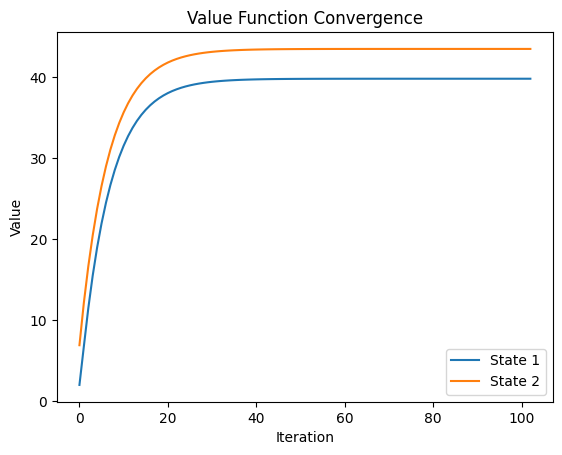

In [2]:
l = np.array(l)

plt.figure()
plt.plot(l[:,0], label="State 1")
plt.plot(l[:,1], label="State 2")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Value Function Convergence")
plt.legend()
plt.show()

### HW1 - Problem 4

In [14]:
# Question 4a
import numpy as np

# Define transition probability matrices P(s'|s,a) for each action
P_a1 = np.array([[0.4, 0.6],    # Action a1: stay in state 0
                 [0.7, 0.3]])

P_a2 = np.array([[0.4, 0.6],    # Action a2: move with some probability
                 [0.7, 0.3]])

# Define reward functions R(s, a)
R_a1 = np.array([1, 4])         # Reward if taking action D in states 0 and 1
R_a2 = np.array([3, 2])         # Reward if taking action F in states 0 and 1

# Define a policy π(a|s) as a probability distribution over actions
# The following policy tells us to always choose A=D
policy = np.array([[1, 0],
                  [1, 0]])

# Compute MRP transition probability matrix in P_π
P_pi = policy[:,0][:,None] * P_a1 + policy[:,1][:,None] * P_a2
print(P_pi)

# Compute MRP reward vector R_π
R_pi = policy[:,0] * R_a1 + policy[:,1] * R_a2
print(R_pi)

# Discount factor
gamma = 0.9

# Identity matrix
I = np.eye(2)

# Solve for value function V using matrix inversion
V = np.linalg.inv(I - gamma * P_pi).dot(R_pi)

print("Value function: ", V)

[[0.4 0.6]
 [0.7 0.3]]
[1 4]
Value function:  [22.75590551 25.11811024]


In [4]:
# Question 4b
import numpy as np

# Given transition probabilities and rewards
P_a1 = np.array([[0.4, 0.6], [0.4, 0.6]])
P_a2 = np.array([[0.7, 0.3], [0.7, 0.3]])
R_a1 = np.array([1, 4])
R_a2 = np.array([3, 2])

gamma = 0.9
theta = 1e-6
states = [0, 1]
actions = ['D', 'F']

# Initialize value function
V = {0: 0, 1: 0}
policy = {0: 'D', 1: 'F'}
l = []

while True:
    delta = 0
    value = V.copy()
    for s in states:
        av = []
        for a, P_a, R_a in zip(actions, [P_a1, P_a2], [R_a1, R_a2]):
            value = sum(P_a[s, s_next] * (R_a[s] + gamma * V[s_next]) for s_next in states)
            av.append(value)
        
        best_av = max(av)
        delta = max(delta, abs(best_av - V[s]))
        V[s] = best_av
        policy[s] = actions[np.argmax(av)]
    
    l.append(list(V.values()))
    if delta < theta:
        break;

final = list(V.values())
print("Final value function:", final, " giving V(0) and V(1)")
print("Optimal policy:", policy)

Final value function: [33.69862313427843, 35.06848663854859]  giving V(0) and V(1)
Optimal policy: {0: 'F', 1: 'D'}
